In [2]:
!pip install scipy==1.2

     |████████████████████████████████| 26.6MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


   weight  sizes  tail
0     0.9    1.4   0.7
1     1.8    2.6   1.3
2     2.4    1.0   0.7
3     3.5    3.7   2.0
4     3.9    5.5   3.6
5     4.4    3.2   3.0
6     5.1    3.0   2.9
7     5.6    4.9   3.9
8     6.3    6.3   4.0
0.6132867420657665 [0.56578391 0.01255906]
r2_score 0.6132867420657665
fvalue 11.101267169874111
f_pvalue 0.012559062326425313
0.9874409376735747
0.012559062326425341
0.012559062326425341
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     11.10
Date:                Mon, 10 Jun 2019   Prob (F-statistic):             0.0126
Time:                        05:49:38   Log-Likelihood:                -13.208
No. Observations:                   9   AIC:                             30.42
Df Residuals:                

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



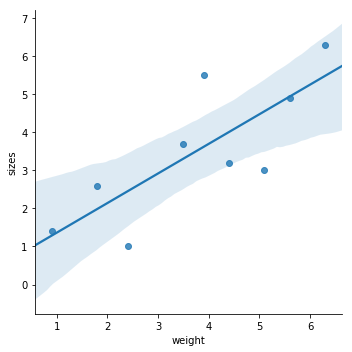

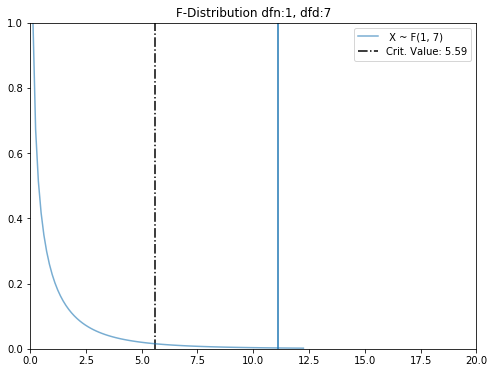

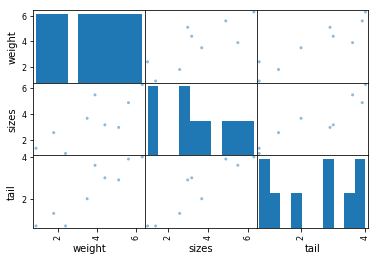

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



r2_score,pvalues 0.8496437693322927 const     0.319163
weight    0.434519
tail      0.021910
dtype: float64
r2_score 0.8496437693322927
fvalue 16.95261511064419
f_pvalue 0.003399102720405895
0.9966008972795941
f_pvalue 0.003399102720405889
                            OLS Regression Results                            
Dep. Variable:                  sizes   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     16.95
Date:                Mon, 10 Jun 2019   Prob (F-statistic):            0.00340
Time:                        05:49:40   Log-Likelihood:                -8.9568
No. Observations:                   9   AIC:                             23.91
Df Residuals:                       6   BIC:                             24.51
Df Model:                           2                                         
Covariance Type:            nonrobust            

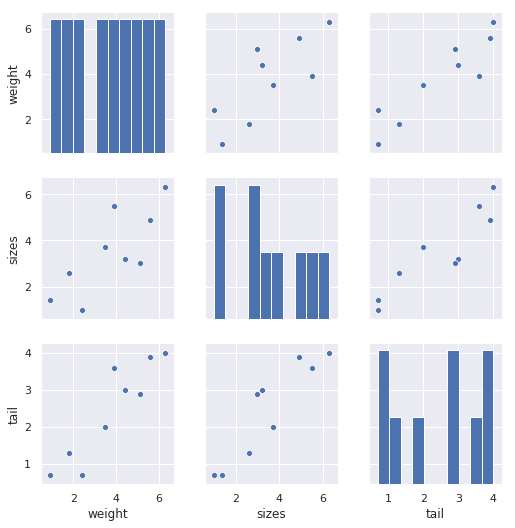

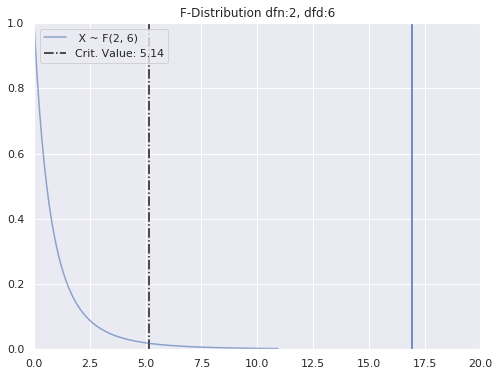

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 20 18:42:39 2019

@author: Guru

https://seaborn.pydata.org/tutorial/regression.html
"""

## Here's the data
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot
from plotly.graph_objs import *
from sklearn.linear_model  import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## Here's the data from the example:
mouse = pd.DataFrame({"weight":[0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3],
  "sizes":[1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3],
   "tail" :[0.7, 1.3, 0.7, 2.0, 3.6, 3.0, 2.9, 3.9, 4.0]})
print(mouse)

#######################################################
##
## Let's start by reviewing simple regression by 
## modeling mouse size with mouse weight.
##
#######################################################

## STEP 1: Draw a graph of the data to make sure the relationship make sense
#Plotting Scatter Matrix using pandas


trace0 = Scatter(
    x=mouse.weight,
    y=mouse.sizes,
    mode='markers')


## STEP 2: Do the regression
X2 = sm.add_constant(mouse.iloc[:,0:1].values)
est = sm.OLS(mouse.iloc[:,1].values, X2)
est2  = est.fit()


## STEP 3: Look at the R^2, F-value and p-value
print(est2.rsquared,est2.pvalues)


# Plot using plotly
# add the regression line to our x/y scatter plot
trace2 = Scatter(
    x = mouse.weight,
    y = est2.predict(X2)
)


data = [trace0,trace2]

layout = Layout(
    showlegend=True,
    height=600,
    width=600,
)

fig = dict( data=data, layout=layout )
#plot(fig)


sns.lmplot(x="weight", y="sizes", data=mouse);


# Plot using Seaborn
#Plotting Scatter Matrix using seaborn

"""sns.set()
sns.pairplot(mouse)
#Plotting Scatter Matrix using pandas
pd.plotting.scatter_matrix(mouse); 
plt.show()"""

# cumulative distribution function
from scipy.stats import f, norm
def plot_f_distrubiton(fvalue,dfn,dfd):
    # Set figure 
    plt.figure(figsize=(8, 6))
    
    # Set degrees of freedom
    
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.axvline(x=fvalue)
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.ylim(0.0, 1.0)
    plt.xlim(0.0, 20.0,5)
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
    
plot_f_distrubiton(est2.fvalue,1,7);

from sklearn.metrics import r2_score
print("r2_score",r2_score(mouse.sizes,est2.predict(X2)))
print("fvalue",est2.fvalue)
print("f_pvalue",est2.f_pvalue)

print(stats.f.cdf(est2.fvalue,1,7))
print(1-stats.f.cdf(est2.fvalue,1,7))
ss_mean = sum((mouse.sizes - np.mean(mouse.sizes))**2)
ss_simple = sum((mouse.sizes - est2.fittedvalues)**2)
f_simple = ((ss_mean - ss_simple) / (2 - 1))/ (ss_simple/ (len(mouse) - 2))
print(1-stats.f.cdf(f_simple,1,7))
print(est2.summary())

#######################################################
##
## Now let's do multiple regression by adding an extra term, tail length
##
#######################################################

## STEP 1: Draw a graph of the data to make sure the relationship make sense
## This graph is more complex because it shows the relationships between all
## of the columns in "mouse.data".
pd.plotting.scatter_matrix(mouse); 
plt.show()

sns.set()
sns.pairplot(mouse)

#plot(mouse.data)

## STEP 2: Do the regression

X2 = mouse[['weight', 'tail']]
y = mouse['sizes']
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2).fit()

print("r2_score,pvalues",est.rsquared,est.pvalues)


print("r2_score",r2_score(mouse.sizes,est.predict(X2)))
print("fvalue",est.fvalue)
print("f_pvalue",est.f_pvalue)

plot_f_distrubiton(est.fvalue,2,6);

print(stats.f.cdf(est.fvalue,2,6))
print("f_pvalue",1-stats.f.cdf(est.fvalue,2,6))


## lastly, let's compare this p-value to the one from the 
## original regression


#ss_mean = sum((mouse.sizes - np.mean(mouse.sizes))**2)
ss_multiple = sum((mouse.sizes - est.fittedvalues)**2)

f_multiple = ((ss_mean - ss_multiple) / (len(est.params) - 1)) / (ss_multiple / (len(mouse) - len(est.params)))
print(est.summary())

## we can also verify that the F-value is what we think it is


#######################################################
##
## Now, let's see if "tail" makes a significant controbution by 
## comparing the "simple" fit (which does not include the tail data) 
## to the "multiple" fit (which has the extra term for the tail data)
##
#######################################################

f_simple_v_multiple =  ((ss_simple - ss_multiple) / (len(est.params)-2)) / (ss_multiple / (len(mouse) - len(est.params)))

print(f_simple_v_multiple)
print(1-stats.f.cdf(f_simple_v_multiple,1,6))


## Notice that this value is the same as the p-value next to the term for
## for "tail" in the summary of multiple regression:
print(est.summary())

## Thus, the summary already calculated this F-value and p-value for us.
## this line tells us that including the "tail" term makes a statistically
## significant difference. The magnitude can be determined by looking
## at the change in R^2 between the simple and multiple regressions.

In [3]:
mouse.iloc[:,1].values

array([1.4, 2.6, 1. , 3.7, 5.5, 3.2, 3. , 4.9, 6.3])

In [4]:
mouse

,weight,sizes,tail
0,0.9,1.4,0.7
1,1.8,2.6,1.3
2,2.4,1.0,0.7
3,3.5,3.7,2.0
4,3.9,5.5,3.6
5,4.4,3.2,3.0
6,5.1,3.0,2.9
7,5.6,4.9,3.9
8,6.3,6.3,4.0


In [5]:
X2

,const,weight,tail
0,1.0,0.9,0.7
1,1.0,1.8,1.3
2,1.0,2.4,0.7
3,1.0,3.5,2.0
4,1.0,3.9,3.6
5,1.0,4.4,3.0
6,1.0,5.1,2.9
7,1.0,5.6,3.9
8,1.0,6.3,4.0
